In [264]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

rng = np.random

### Simulate data
We are playing a game of Plinko and trying to model our payout over time. A coin is fed into the machine and falls down a series of pegs into one of many buckets, each having a payout between 0 and 10, centered on 5. Assume the chance of landing in a bucket is normally distributed.

In [265]:
N = 1000
data = rng.normal(5.0, 1.0, size=N)

### Implement the prior and likelihood distributions
$$
\begin{align}
    p(\mu) &= N(\mu | \mu_0, \sigma_0)\\
    p(y | \mu, \sigma^2) &= N(y | \mu, \sigma^2)
\end{align}
$$

In [266]:
def calculate_prior(mu0, sigma0):
    return rng.normal(mu0, sigma0, size=1000)

def calculate_likelihood(x):
    mu = np.mean(x)
    sigma2 = np.std(x) ** 2
    return rng.normal(mu, sigma2, size=1000)

def calculate_posterior(x, mu0, sigma0):
    sigma2 = np.std(x) ** 2
    
    simga_post = ((sigma0**2)*sigma2) / (sigma2 + (len(x)*(sigma0**2)))
    mu_post = simga_post * (((mu0*sigma2) + sum(x * (sigma0**2))) / ((sigma0**2)*sigma2))
    
    return rng.normal(mu_post, simga_post + sigma2, size=1000)



mu0 = 4.0
sigma0 = 3.0
prior = calculate_prior(mu0, sigma0)
likelihood = calculate_likelihood(data)
posterior = calculate_posterior(data, mu0, sigma0)

### Deriving hyperparameters for posterior
$$
\begin{align}
    posterior &\sim N(\mu_{post}, \sigma_{post}^2) \\
    \sigma_{post}^2 &= \frac{\sigma_0^2\sigma^2}{\sigma^2 + n\sigma_0^2} \\
    \mu_{post} &= \sigma_{post}^2 [ \frac{\mu_0\sigma^2 + \sum_{i=1}^n x_i\sigma_0^2}{\sigma_0^2\sigma^2} ]
\end{align}
$$

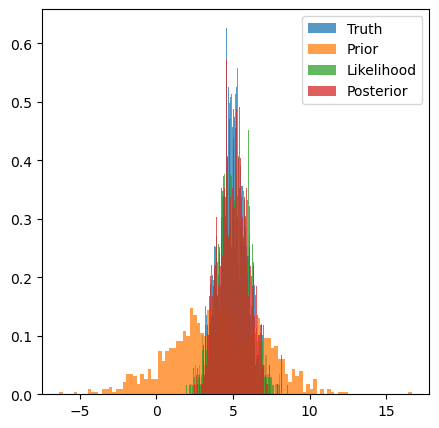

In [267]:
def visualize_distribution(prior, likelihood, posterior, ground_truth):
    f, ax = plt.subplots(1,1,figsize=(5,5))
    ax.hist(ground_truth, 100, density=True, alpha=0.75, label="Truth")
    ax.hist(prior, 100, density=True, alpha=0.75, label="Prior")
    ax.hist(likelihood, 100, density=True, alpha=0.75, label="Likelihood")
    ax.hist(posterior, 100, density=True, alpha=0.75, label="Posterior")
    ax.legend()

visualize_distribution(prior, likelihood, posterior, data)